Automatically created module for IPython interactive environment


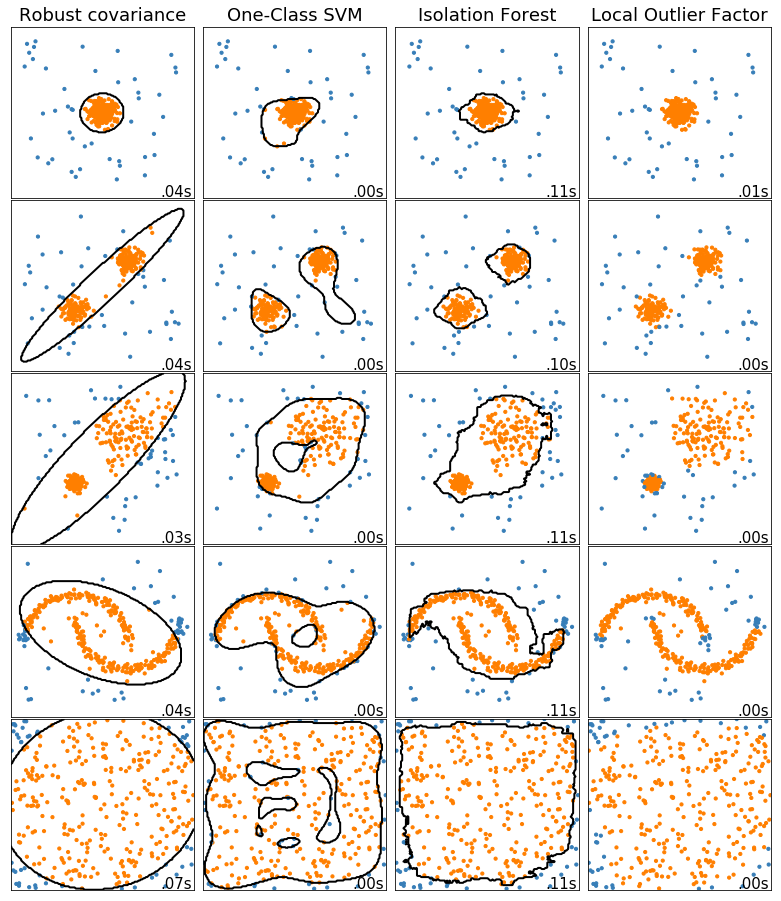

In [2]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()


In [14]:
n_samples = 1500
outliers_fraction = 0.02
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
isolation = IsolationForest(behaviour='new',n_estimators=1000,max_samples=0.3,max_features=min(2,3),bootstrap=True,
                                         contamination="auto",
                                         random_state=42)
lof = svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=3)
normal = make_blobs(n_samples=n_samples, n_features=3, cluster_std=[30,40,50,60],
                   shuffle=False, random_state=42,center_box=(100,1500),centers=4)[0].astype(int)
anomaly = rng.uniform(low=0, high=1500,
                       size=(n_outliers, 3)).astype(int)
data = np.concatenate([normal, anomaly], axis=0)

In [15]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go



import numpy as np
import plotly
init_notebook_mode(connected=True)

In [16]:
normal_data = go.Scatter3d(
    x=normal[:,0],
    y=normal[:,1],
    z=normal[:,2],
    mode='markers',
    marker=dict(
        color='rgb(200, 200, 200)',
        size=8,
        line=dict(
            color='rgb(217, 217, 217)',
            width=0.5
        ),
        opacity=0
    ),
    name="normal"
)

anomaly_data = go.Scatter3d(
    x=anomaly[:,0],
    y=anomaly[:,1],
    z=anomaly[:,2],
    mode='markers',
    marker=dict(
        color='rgb(255, 0, 0)',
        size=8,
        line=dict(
            color='rgb(217, 0, 0)',
            width=0.5
        ),
        opacity=0
    ),
    name="anomaly"
)

data_plot = [normal_data,anomaly_data]

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title='logon_count'),
        yaxis = dict(
            title='in_conn_count'),
        zaxis = dict(
            title='out_conn_count'),),
    autosize=False,
    width=1000,
    height=700,
                  )
fig = go.Figure(data=data_plot, layout=layout)
iplot(figure_or_data=fig)

In [17]:
mod = isolation.fit(data)
y_pred = mod.predict(data)
x = np.where(y_pred==1)[0]
normal = data[x]
x = np.where(y_pred==-1)[0]
anomaly = data[x]


In [18]:
normal.shape

(1296, 3)

In [19]:
anomaly.shape

(234, 3)

In [20]:
normal_data = go.Scatter3d(
    x=normal[:,0],
    y=normal[:,1],
    z=normal[:,2],
    mode='markers',
    marker=dict(
        color='rgb(200, 200, 200)',
        size=8,
        line=dict(
            color='rgb(217, 217, 217)',
            width=0.5
        ),
        opacity=0
    ),
    name="normal"
)

anomaly_data = go.Scatter3d(
    x=anomaly[:,0],
    y=anomaly[:,1],
    z=anomaly[:,2],
    mode='markers',
    marker=dict(
        color='rgb(255, 0, 0)',
        size=8,
        line=dict(
            color='rgb(217, 0, 0)',
            width=0.5
        ),
        opacity=0
    ),
    name="anomaly"
)

data_plot = [normal_data,anomaly_data]

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title='logon_count'),
        yaxis = dict(
            title='in_conn_count'),
        zaxis = dict(
            title='out_conn_count'),),
    autosize=False,
    width=1000,
    height=700,
                  )
fig = go.Figure(data=data_plot, layout=layout)
iplot(figure_or_data=fig)

In [201]:
y_pred = lof.fit_predict(data)
x = np.where(y_pred==1)[0]
normal = data[x]
x = np.where(y_pred==-1)[0]
anomaly = data[x]



In [202]:
normal_data = go.Scatter3d(
    x=normal[:,0],
    y=normal[:,1],
    z=normal[:,2],
    mode='markers',
    marker=dict(
        color='rgb(200, 200, 200)',
        size=8,
        line=dict(
            color='rgb(217, 217, 217)',
            width=0.5
        ),
        opacity=0
    ),
    name="normal"
)

anomaly_data = go.Scatter3d(
    x=anomaly[:,0],
    y=anomaly[:,1],
    z=anomaly[:,2],
    mode='markers',
    marker=dict(
        color='rgb(255, 0, 0)',
        size=8,
        line=dict(
            color='rgb(217, 0, 0)',
            width=0.5
        ),
        opacity=0
    ),
    name="anomaly"
)

data_plot = [normal_data,anomaly_data]

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title='logon_count'),
        yaxis = dict(
            title='in_conn_count'),
        zaxis = dict(
            title='out_conn_count'),),
    autosize=False,
    width=1000,
    height=700,
                  )
fig = go.Figure(data=data_plot, layout=layout)
iplot(figure_or_data=fig)

In [197]:
ll = lof.fit(data)

In [198]:
lof.decision_function(data)

AttributeError: decision_function is not available when novelty=False. Use novelty=True if you want to use LOF for novelty detection and compute decision_function for new unseen data. Note that the opposite LOF of the training samples is always available by considering the negative_outlier_factor_ attribute.

In [199]:
mod.decision_function(data)

array([ 0.08294836,  0.03936087,  0.05243066, ..., -0.19613026,
       -0.13318081, -0.17187651])